## Assignment-9 Regression Analysis

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [225]:
df  = pd.read_csv('Student_Marks - Sheet1.csv') 

In [226]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
126,3,6.335,32.357
127,3,0.301,5.609
128,4,7.163,41.444
129,7,0.309,12.027


In [227]:
df.describe()

,number_courses,time_study,Marks
count,131.000000,127.000000,122.000000
mean,5.251908,3.880661,23.427475
std,1.820159,2.340316,13.812173
min,2.000000,0.096000,5.609000
25%,4.000000,1.968000,12.151250
50%,5.000000,3.919000,19.680500
75%,7.000000,6.103000,32.076750
max,8.000000,7.957000,55.299000


In [228]:
df.isna().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

In [229]:
df.isna().any()

number_courses    False
time_study         True
Marks              True
dtype: bool

In [230]:
df['time_study'].isna().sum()

4

In [231]:
df['time_study'].fillna(df['time_study'].mean(),inplace = True)

In [232]:
df['Marks'].isna().sum()

9

In [233]:
df['Marks'].fillna(df['Marks'].median(),inplace = True)

In [234]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [235]:
bar_data = pd.DataFrame(df['number_courses'].value_counts()).reset_index()

<AxesSubplot:ylabel='time_study'>

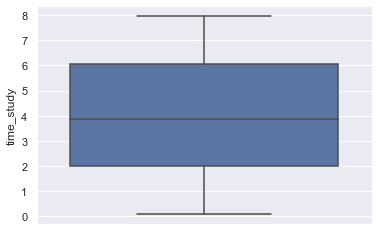

In [236]:
sns.boxplot(y="time_study", data = df)

<AxesSubplot:ylabel='Marks'>

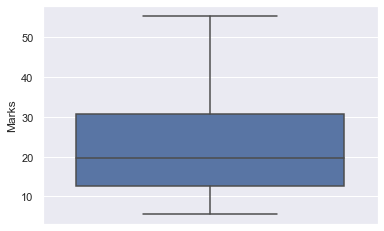

In [237]:
sns.boxplot(y="Marks", data = df)

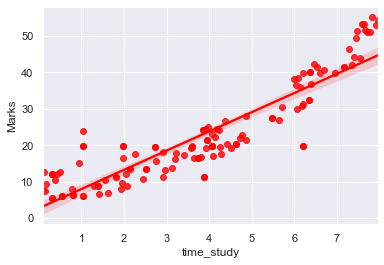

In [238]:
sns.regplot(data = df,x = 'time_study',y = 'Marks',color='red')
plt.show()

## Simple Linear Regression

In [239]:
x1_simple = df['time_study']
y_simple = df['Marks']

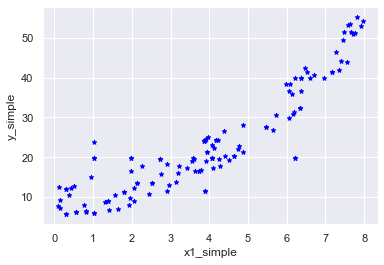

In [240]:
plt.scatter(x1_simple,y_simple,s=20,c='blue',marker='*')
plt.xlabel('x1_simple')
plt.ylabel('y_simple')
plt.show()

<AxesSubplot:>

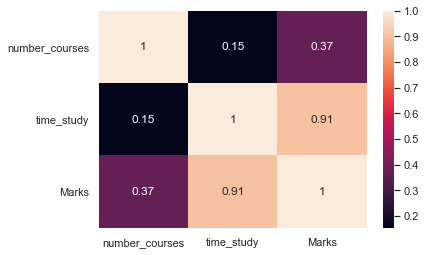

In [241]:
sns.heatmap(df.corr(), annot=True)

In [242]:
x=x1_simple.values.reshape(-1,1)
y=y_simple.values.reshape(-1,1)

reg=LinearRegression()

#predict ytrain values
reg.fit(x,y)
y_pred=reg.predict(x)


In [243]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2736.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                    3.46e-89
Time:                        22:55:18   Log-Likelihood:                         -413.67
No. Observations:                 131   AIC:                                      829.3
Df Residuals:                     130   BIC:                                      832.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

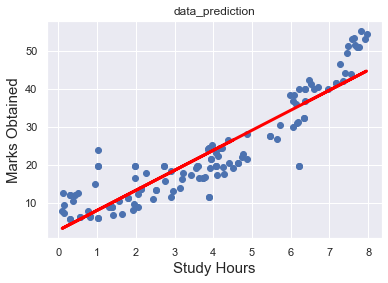

In [244]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red",linewidth=3)
plt.title("data_prediction")
plt.xlabel("Study Hours",fontsize = 15)
plt.ylabel("Marks Obtained", fontsize=15)
plt.show()

## Polynomial Regression

In [245]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

In [246]:
X_poly = poly_reg.fit_transform(x)

In [247]:
lin_reg_model2 = LinearRegression()

In [248]:
lin_reg_model2.fit(X_poly, y)

LinearRegression()

In [249]:
y_pred2 = lin_reg_model2.predict(X_poly)

In [250]:
y_pred2

array([[22.83765884],
       [10.30951078],
       [15.88298239],
       [51.90460421],
       [50.83059549],
       [16.20360526],
       [34.03081703],
       [17.07525066],
       [22.25056686],
       [34.95639839],
       [19.32200468],
       [19.32200468],
       [19.32200468],
       [19.32200468],
       [45.9972569 ],
       [10.26231273],
       [21.14101746],
       [21.45907291],
       [15.00790734],
       [21.37912954],
       [31.25035086],
       [34.17270658],
       [49.74913119],
       [19.82452671],
       [24.23865972],
       [34.55875985],
       [12.35217338],
       [25.16091374],
       [18.10195363],
       [11.06258689],
       [10.27562458],
       [22.06190205],
       [10.28914874],
       [10.90564527],
       [19.23647052],
       [12.04761312],
       [10.49967052],
       [38.66214407],
       [20.39311135],
       [47.96515905],
       [15.22640708],
       [45.28553456],
       [38.10916631],
       [50.43958538],
       [10.29406438],
       [14

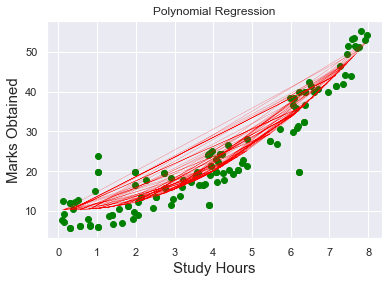

In [251]:
plt.scatter(x, y, color='green', label='')
plt.plot(x, y_pred2, color="red", label='',linewidth=0.2)
plt.title("Polynomial Regression")
plt.xlabel("Study Hours",fontsize = 15)
plt.ylabel("Marks Obtained", fontsize=15)
plt.show()